In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.special import expit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
!head -n 5 spotify-recommendation.csv

danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0.803,0.624,7,-6.764,0,0.0477,0.451,0.000734,0.1,0.628,95.968,304524,4,0
0.762,0.703,10,-7.951,0,0.306,0.206,0.0,0.0912,0.519,151.329,247178,4,1
0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897,0.102,0.0382,75.296,286987,4,0
0.722,0.736,3,-6.994,0,0.0585,0.431,1.18e-06,0.123,0.582,89.86,208920,4,1


In [3]:
df = pd.read_csv("spotify-recommendation.csv")
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [4]:
speech_min = df.speechiness.min()
speech_max = df.speechiness.max()
df.speechiness = df.speechiness.apply(lambda x: (x-speech_min)/(speech_max-speech_min))
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.038852,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.543147,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.027528,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.059938,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.379149,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [9]:
factor = df.duration_ms

Text(0, 0.5, 'Понравилась ли песня')

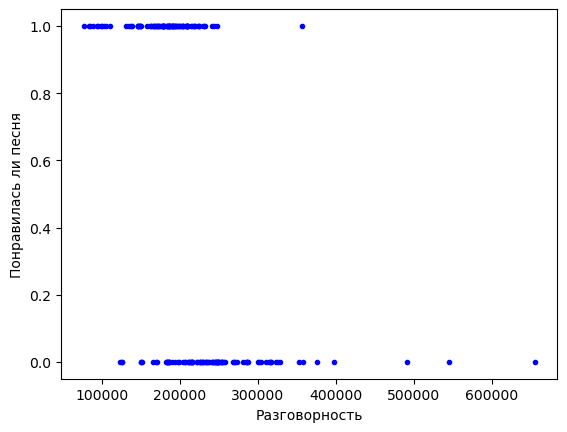

In [10]:
# фактор - speechiness, отклик - liked
plt.scatter(factor, df.liked, marker=".", color="blue")
plt.xlabel("Разговорность")
plt.ylabel("Понравилась ли песня")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(factor, df.liked, test_size=0.25, random_state=42)
y_train.shape

(146,)

In [8]:
y_test.shape

(49,)

In [9]:
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

False
True


In [29]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [50]:
# Выберем некоторые данные из тестовой выборки для проверки
y_test[10:20]

184    0
18     1
82     1
9      1
164    0
117    0
69     1
113    0
192    0
119    1
Name: liked, dtype: int64

In [51]:
# предскажем факт того, понравится ли песня пользователю
LogReg.predict(X_test[10:20])

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [52]:
# выведем коэффициенты регрессонной модели
LogReg.coef_

array([[4.0646453]])

In [53]:
LogReg.intercept_

array([-0.82923411])

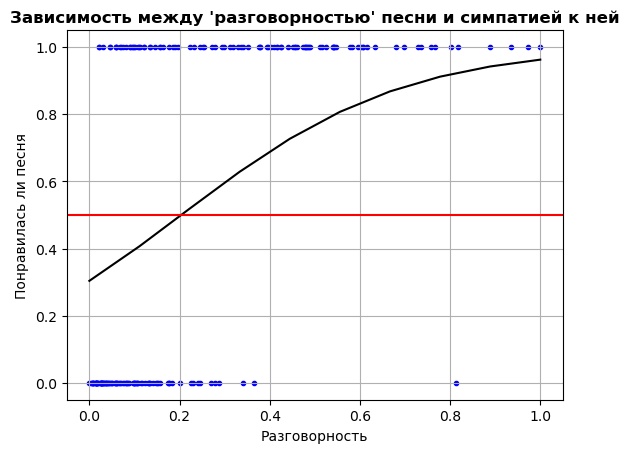

In [56]:
# облако точек
plt.scatter(factor, df.liked, marker=".", color="blue")
plt.xlabel("Разговорность")
plt.ylabel("Понравилась ли песня")
plt.title("Зависимость между 'разговорностью' песни и симпатией к ней", fontweight='bold')

# график сигмоидной функции
x_test1 = np.linspace(0, 1, 10)
y_test1 = x_test1 * LogReg.coef_ + LogReg.intercept_
sigmoid = expit(y_test1)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.plot(x_test1, sigmoid.ravel(), c="black", label="logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.grid()

In [58]:
# оценим модель
LogReg.score(X_test, y_test.astype(int))

0.7551020408163265

In [59]:
# абсолютная ошибка
mean_absolute_error(y_test, LogReg.predict(X_test))

np.float64(0.24489795918367346)

In [60]:
# квадратичная ошибка
mean_squared_error(y_test, LogReg.predict(X_test))

np.float64(0.24489795918367346)

In [38]:
print(X_train[:5])
LogReg.predict_proba(X_train[:5])

[[0.60757517]
 [0.10054666]
 [0.05857087]
 [0.06969934]
 [0.09820383]]


array([[0.16241834, 0.83758166],
       [0.60361428, 0.39638572],
       [0.64363224, 0.35636776],
       [0.63319104, 0.36680896],
       [0.60589048, 0.39410952]])

In [41]:
LogReg.predict([[0.8], [0.25], [0.15], [0.1]])

array([1, 1, 0, 0])

Text(0.5, 1.0, "Зависимость между 'разговорностью' песни и симпатией к ней")

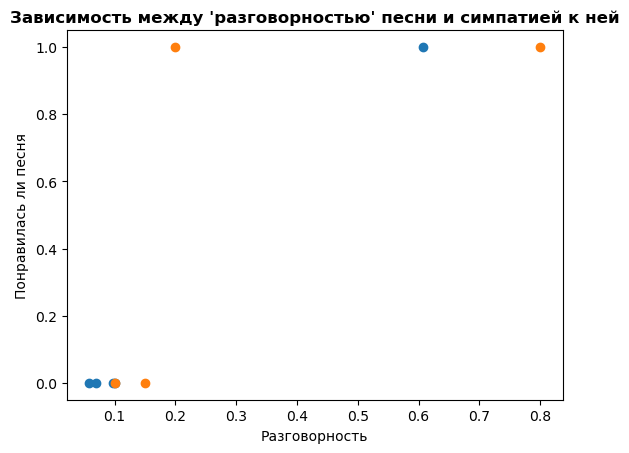

In [57]:
plt.scatter(X_train[:5], LogReg.predict(X_train[:5]))
plt.scatter([0.8, 0.2, 0.15, 0.1], [1, 1, 0, 0])

plt.xlabel("Разговорность")
plt.ylabel("Понравилась ли песня")
plt.title("Зависимость между 'разговорностью' песни и симпатией к ней", fontweight='bold')